In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter

sns.set()
sns.set_style("whitegrid")

out_file_path = "./"

In [2]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        "trunc({n},{a:.2f},{b:.2f})".format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)),
    )
    return new_cmap

In [3]:
names = [
    "n","block","copy_name", "copy","triad_name", "triad","scale_name", "scale","add_name", "add", "endl"
]

half_data = pd.read_csv('../data/stream-16.csv', names=names)
float_data = pd.read_csv('../data/stream-32.csv', names=names)
double_data = pd.read_csv('../data/stream-64.csv', names=names)

print(half_data)

              n  block copy_name      copy triad_name     triad scale_name  \
0         10000     32      copy   14.0449      triad   19.5312      scale   
1         10000     64      copy   19.5313      triad   21.8023      scale   
2         10000    128      copy   19.5313      triad   29.2969      scale   
3         10000    256      copy   19.5313      triad   21.8023      scale   
4         10000    512      copy   19.5313      triad   29.2969      scale   
...         ...    ...       ...       ...        ...       ...        ...   
11995  20000000     64      copy  465.0300      triad  697.5450      scale   
11996  20000000    128      copy  877.8090      triad  931.4460      scale   
11997  20000000    256      copy  919.1180      triad  932.1400      scale   
11998  20000000    512      copy  921.4890      triad  937.5000      scale   
11999  20000000   1024      copy  773.5150      triad  855.3830      scale   

           scale add_name       add  endl  
0        13.8889   

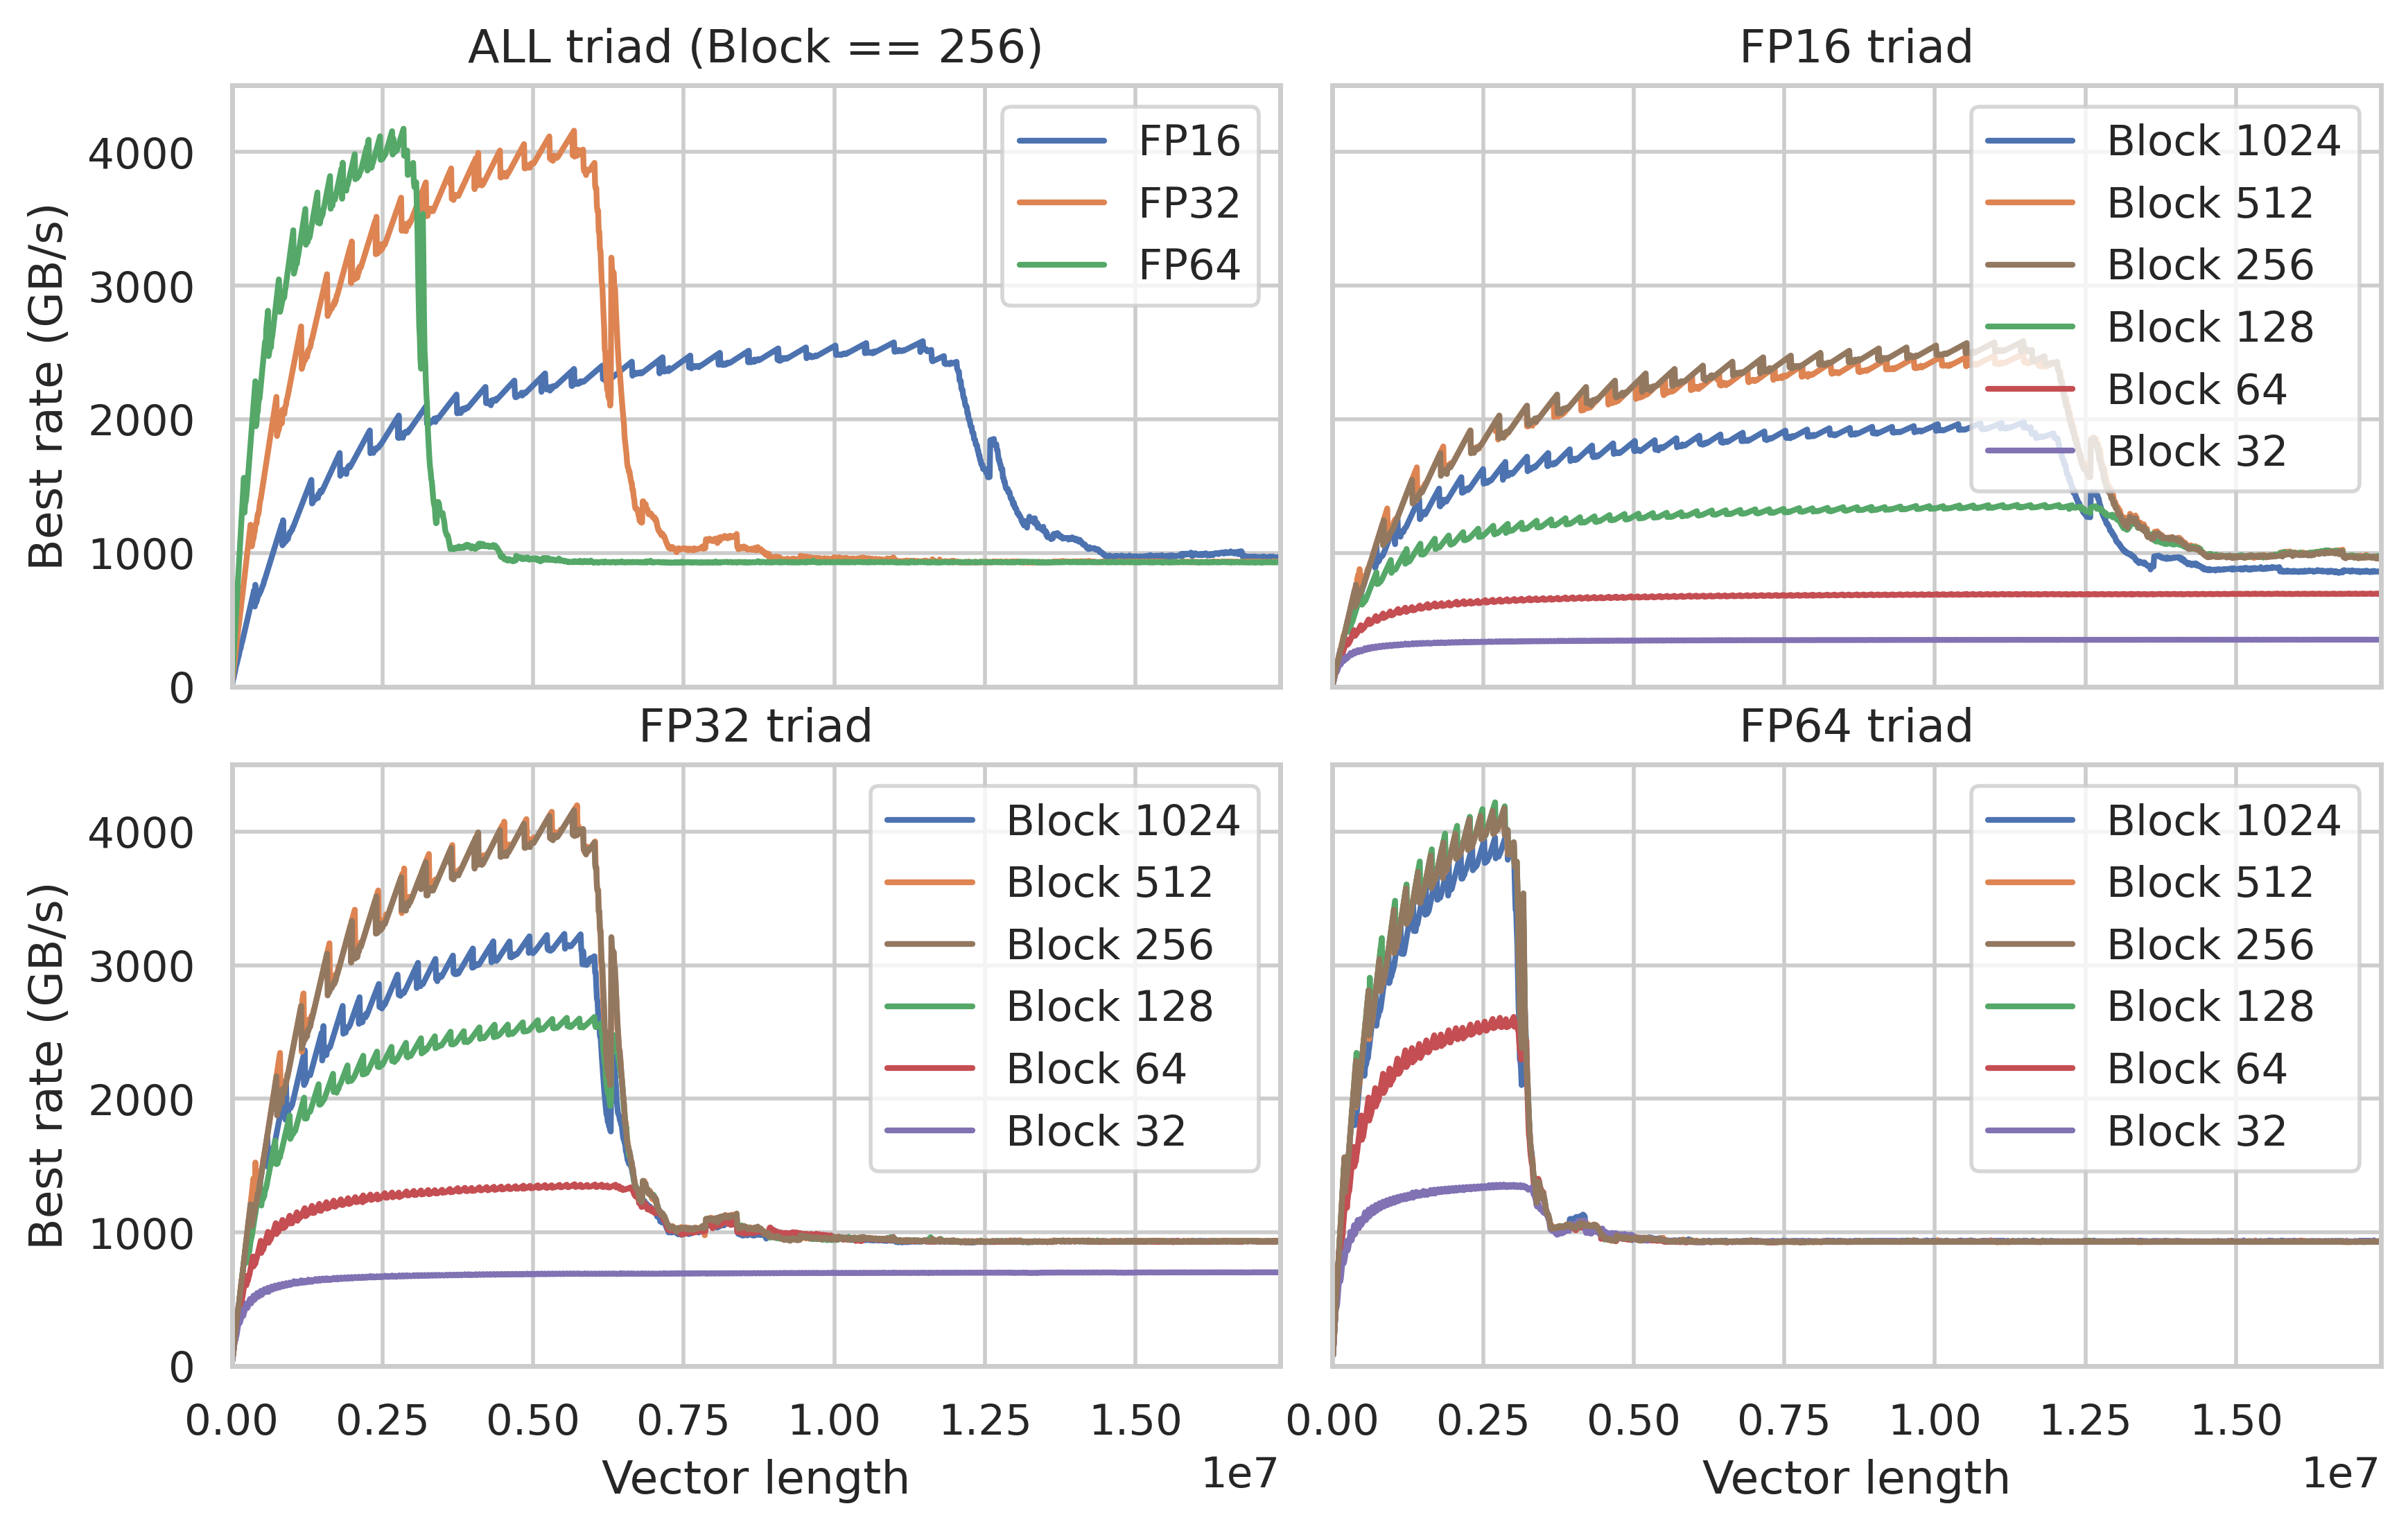

In [4]:
%matplotlib inline
plt.figure(figsize=(10, 6), dpi=400)
plt.subplots_adjust(wspace=0.05, hspace=0.13)

plt.subplot(2,2,1)
plt.title("ALL triad (Block == 256)")
plt.plot(half_data[half_data["block"] == 256]["n"], half_data[half_data["block"] == 256]["triad"], label="FP16")
plt.plot(float_data[float_data["block"] == 256]["n"], float_data[float_data["block"] == 256]["triad"], label="FP32")
plt.plot(double_data[double_data["block"] == 256]["n"], double_data[double_data["block"] == 256]["triad"], label="FP64")

plt.legend()

plt.xlim(0, 1.74e7)
plt.ylim(0,4500)
plt.ylabel("Best rate (GB/s)")
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])

plt.subplot(2,2,2)
plt.title("FP16 triad")
plt.plot(half_data[half_data["block"] == 1024]["n"], half_data[half_data["block"] == 1024]["triad"], label="Block 1024")
plt.plot(half_data[half_data["block"] == 512]["n"], half_data[half_data["block"] == 512]["triad"], label="Block 512")
plt.plot(half_data[half_data["block"] == 128]["n"], half_data[half_data["block"] == 128]["triad"], label="Block 128")
plt.plot(half_data[half_data["block"] == 64]["n"], half_data[half_data["block"] == 64]["triad"], label="Block 64")
plt.plot(half_data[half_data["block"] == 32]["n"], half_data[half_data["block"] == 32]["triad"], label="Block 32")
plt.plot(half_data[half_data["block"] == 256]["n"], half_data[half_data["block"] == 256]["triad"], label="Block 256")

handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 1, 5, 2, 3, 4]
plt.legend([handles[i] for i in order], [labels[i] for i in order])
plt.xlim(0, 1.74e7)
plt.ylim(0,4500)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])

plt.subplot(2,2,3)
plt.title("FP32 triad")
plt.plot(float_data[float_data["block"] == 1024]["n"], float_data[float_data["block"] == 1024]["triad"], label="Block 1024")
plt.plot(float_data[float_data["block"] == 512]["n"], float_data[float_data["block"] == 512]["triad"], label="Block 512")
plt.plot(float_data[float_data["block"] == 128]["n"], float_data[float_data["block"] == 128]["triad"], label="Block 128")
plt.plot(float_data[float_data["block"] == 64]["n"], float_data[float_data["block"] == 64]["triad"], label="Block 64")
plt.plot(float_data[float_data["block"] == 32]["n"], float_data[float_data["block"] == 32]["triad"], label="Block 32")
plt.plot(float_data[float_data["block"] == 256]["n"], float_data[float_data["block"] == 256]["triad"], label="Block 256")

handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 1, 5, 2, 3, 4]
plt.legend([handles[i] for i in order], [labels[i] for i in order])

plt.xlim(0, 1.74e7)
plt.ylim(0,4500)
plt.xlabel("Vector length")
plt.ylabel("Best rate (GB/s)")
ax = plt.gca()


plt.subplot(2,2,4)
plt.title("FP64 triad")
plt.plot(double_data[double_data["block"] == 1024]["n"], double_data[double_data["block"] == 1024]["triad"], label="Block 1024")
plt.plot(double_data[double_data["block"] == 512]["n"], double_data[double_data["block"] == 512]["triad"], label="Block 512")
plt.plot(double_data[double_data["block"] == 128]["n"], double_data[double_data["block"] == 128]["triad"], label="Block 128")
plt.plot(double_data[double_data["block"] == 64]["n"], double_data[double_data["block"] == 64]["triad"], label="Block 64")
plt.plot(double_data[double_data["block"] == 32]["n"], double_data[double_data["block"] == 32]["triad"], label="Block 32")
plt.plot(double_data[double_data["block"] == 256]["n"], double_data[double_data["block"] == 256]["triad"], label="Block 256")

handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 1, 5, 2, 3, 4]
plt.legend([handles[i] for i in order], [labels[i] for i in order])

plt.xlim(0, 1.74e7)
plt.ylim(0,4500)
plt.xlabel("Vector length")
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])


plt.savefig (out_file_path + "stream_triad.pdf", dpi= 400, format = "pdf", bbox_inches='tight', pad_inches=0.0) 

In [5]:

print("TRIAD (FP16): ",half_data["triad"].max())
print("TRIAD (FP32): ",float_data["triad"].max())
print("TRIAD (FP64): ",double_data["triad"].max())

print("TRIAD speedup (FP16): ",(half_data[half_data["block"] == 256]["triad"] / double_data[double_data["block"] == 256]["triad"]).max())
print("TRIAD speedup (FP32): ",(float_data[float_data["block"] == 256]["triad"] / double_data[double_data["block"] == 256]["triad"]).max())


TRIAD (FP16):  2584.89
TRIAD (FP32):  4196.78
TRIAD (FP64):  4218.75
TRIAD speedup (FP16):  2.7699984406673948
TRIAD speedup (FP32):  4.463863049567784
